# 演習

2-1で取得した気象データを下記のように整形

|列名|説明|
|---------|---------|
|mean_temp|平均気温(℃)|
|max_temp |最高気温(℃)|
|min_temp |最低気温(℃)|
|humidity |平均湿度(％)|
|relative_humidity|最小相対湿度(％)|
|pressure|平均現地気圧(hPa)|
|precipitation|降水量の合計(mm)|
|duration|日照時間(時間)|
|wind|平均風速(m/s)|

詳細は `handling-weather.ipynb` を参照

In [1]:
%matplotlib inline

import calendar
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_pickle("../data/weather.pickle")
df.head()

,mean_temp,max_temp,min_temp,humidity,relative_humidity,pressure,precipitation,duration,wind
date,,,,,,,,,
2018-01-01,6.8,13.3,1.6,51.0,20.0,1011.9,0.0,9.3,3.1
2018-01-02,7.3,11.4,4.8,34.0,21.0,1013.4,0.0,9.3,4.6
2018-01-03,5.2,8.8,1.4,37.0,16.0,1012.5,0.0,9.5,6.2
2018-01-04,4.8,10.0,0.2,37.0,19.0,1017.3,0.0,9.4,2.6
2018-01-05,3.5,6.1,1.6,60.0,38.0,1014.6,0.5,0.1,1.7


## Q-1

任意のデータを線グラフに可視化

### ヒント
列データの抽出は `df["列名"]`  
複数列を抽出する場合は `df[["列名1", "列名1"]]`

Text(0.5, 1.0, 'air pressure')

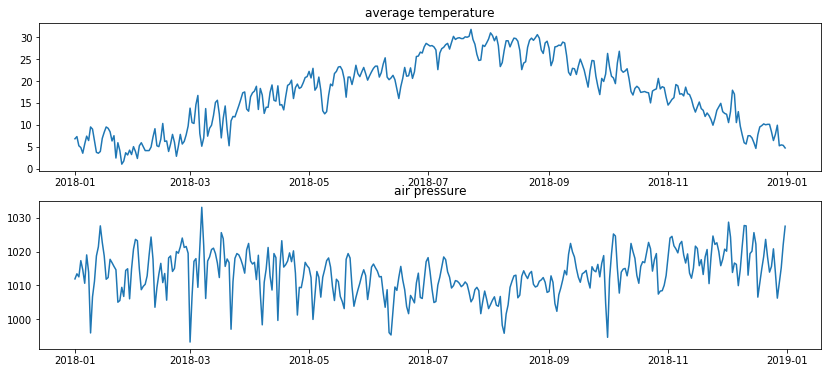

In [2]:
# 解答例

from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(df["mean_temp"])
ax2.plot(df["pressure"])
ax1.set_title("average temperature")
ax2.set_title("air pressure")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f83a5fd6748>,
      dtype=object)

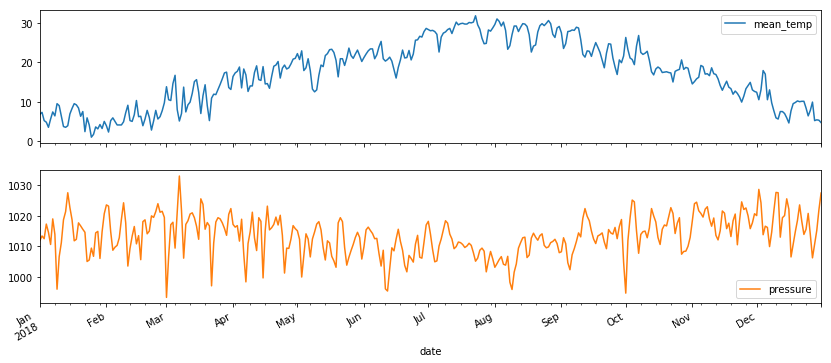

In [3]:
# pandasを用いた場合の解答例

df[["mean_temp", "pressure"]].plot(subplots=True, figsize=(14, 6))

## Q-2

湿度と降水量を散布図に可視化

Text(0, 0.5, 'precipitation')

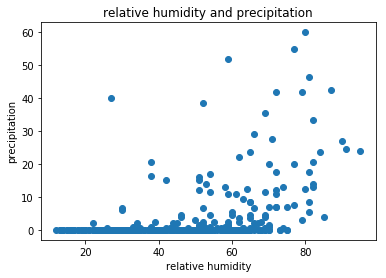

In [4]:
# 解答例

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df["relative_humidity"], df["precipitation"])
ax.set_title("relative humidity and precipitation")
ax.set_xlabel("relative humidity")
ax.set_ylabel("precipitation")

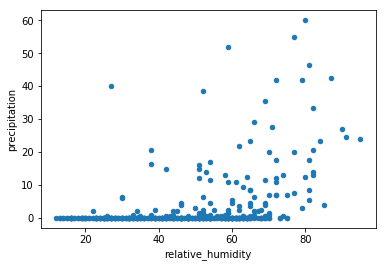

In [5]:
# pandasを用いた解答例

df.plot.scatter(x="relative_humidity", y="precipitation")

## Q-3

任意のデータをヒストグラムに可視化

(array([88., 25., 37., 18., 21., 39., 52., 41., 29., 15.]),
 array([ 0.  ,  1.37,  2.74,  4.11,  5.48,  6.85,  8.22,  9.59, 10.96,
        12.33, 13.7 ]),
 <a list of 10 Patch objects>)

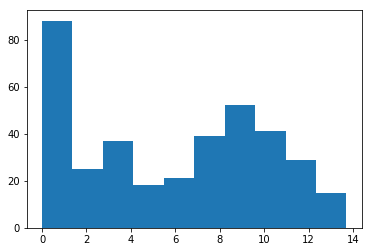

In [6]:
# 解答例

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(df["duration"])

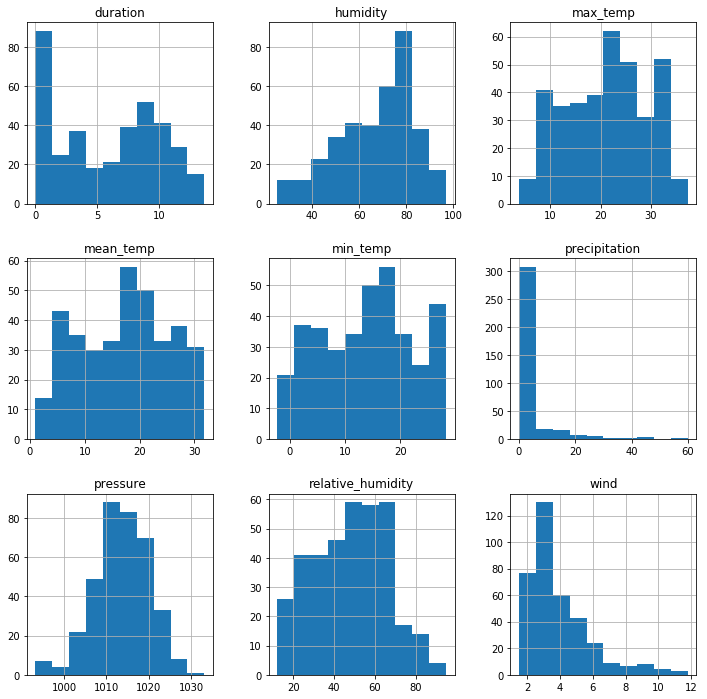

In [7]:
# pandasを用いた解答例

df.hist(figsize=(12, 12));

## Q-3

任意のデータをヒストグラムに可視化

Text(0.5, 1.0, 'temperature')

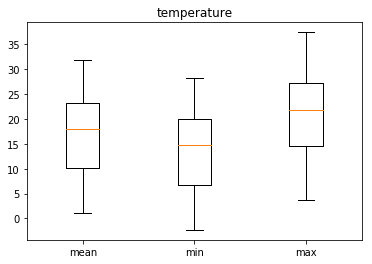

In [8]:
# 解答例

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(
    [df["mean_temp"], df["min_temp"], df["max_temp"]], labels=["mean", "min", "max"]
)
ax.set_title("temperature")

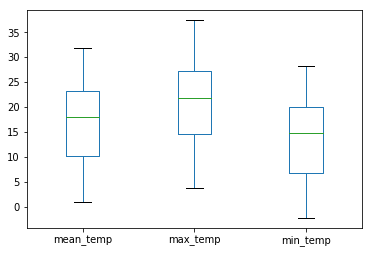

In [9]:
# pandasを用いた解答例

df[["mean_temp", "max_temp", "min_temp"]].plot.box()

## 月ごとの平均値を算出

In [10]:
monthly_df = df.resample("1M").mean()
monthly_df.index = monthly_df.index.map(lambda x: calendar.month_abbr[x.month])
monthly_df

,mean_temp,max_temp,min_temp,humidity,relative_humidity,pressure,precipitation,duration,wind
date,,,,,,,,,
Jan,5.590323,9.645161,1.800000,49.387097,29.741935,1013.616129,1.935484,6.738710,3.680645
Feb,5.846429,9.657143,2.178571,51.071429,32.678571,1016.053571,0.642857,6.000000,3.167857
Mar,11.864516,16.158065,7.377419,63.967742,43.838710,1016.319355,6.080645,6.412903,4.087097
Apr,17.176667,21.440000,13.363333,64.866667,42.433333,1013.820000,2.550000,6.520000,4.816667
May,19.996774,24.190323,16.325806,68.354839,46.903226,1010.925806,6.193548,6.264516,4.383871
Jun,22.456667,26.266667,19.676667,79.166667,60.633333,1008.813333,5.216667,5.450000,4.106667
Jul,28.245161,32.103226,25.425806,77.419355,59.677419,1010.045161,2.677419,7.683871,5.022581
Aug,28.141935,32.170968,25.206452,76.290323,58.096774,1008.283871,1.887097,7.454839,4.719355
Sep,23.530000,26.980000,20.680000,81.133333,65.366667,1012.910000,9.500000,3.100000,4.103333


## Q-3

`monthly_df` の任意のデータを棒グラフに可視化

Text(0.5, 1.0, 'average wind speed')

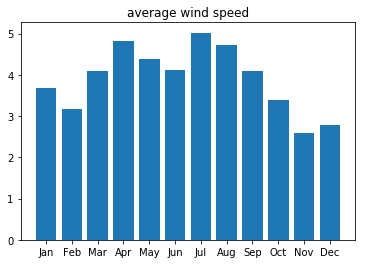

In [11]:
# 解答例

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.bar(range(len(monthly_df)), monthly_df["wind"], tick_label=monthly_df.index)
ax.set_title("average wind speed")

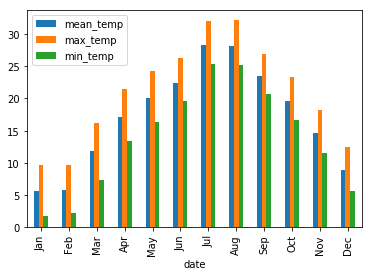

In [12]:
# pandasを用いた場合の解答例

monthly_df[["mean_temp", "max_temp", "min_temp"]].plot.bar()